### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [5]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [6]:
data.describe(include='object')

,destination,passanger,weather,time,coupon,expiration,gender,age,maritalStatus,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
count,12684,12684,12684,12684,12684,12684,12684,12684,12684,12684,12684,12684,108,12577,12467,12533,12554,12495
unique,3,4,3,5,5,2,2,8,5,6,25,9,5,5,5,5,5,5
top,No Urgent Place,Alone,Sunny,6PM,Coffee House,1d,Female,21,Married partner,Some college - no degree,Unemployed,$25000 - $37499,Scooter and motorcycle,never,less1,1~3,1~3,less1
freq,6283,7305,10069,3230,3996,7091,6511,2653,5100,4351,1870,2013,22,5197,3385,4672,5376,6077


In [7]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#Remove duplicates
duplicate = data[data.duplicated(keep = 'first')] 
data = data.drop_duplicates()
print("Shape of dataset after removing duplicates:",data.shape)

Shape of dataset after removing duplicates: (12610, 26)


3. Decide what to do about your missing data -- drop, replace, other...

In [9]:
#We can see that ‘car’ feature has 99% of the missing value so we can drop this
data.drop(columns = {'car'}, inplace = True)

4. What proportion of the total observations chose to accept the coupon?



In [10]:
ans4 = data.query('Y == 1')[['Y']].count() / data.shape[0]*100
print(ans4)


Y    56.756542
dtype: float64


5. Use a bar plot to visualize the `coupon` column.

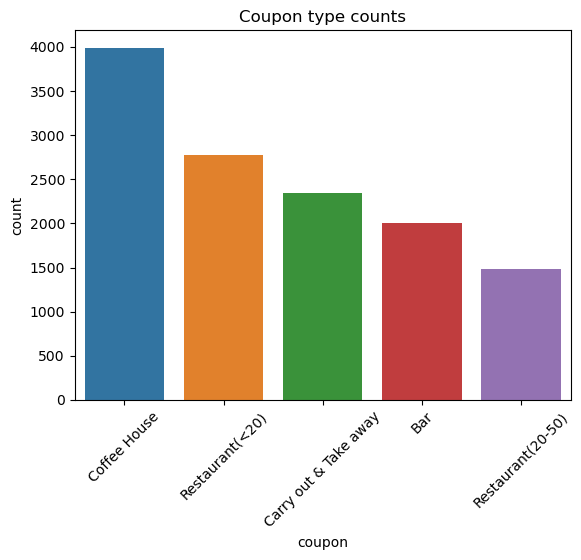

In [11]:
sns.countplot(data = data, x = 'coupon', order=data['coupon'].value_counts().index)
plt.title('Coupon type counts')
plt.xticks(rotation = 45)
plt.savefig('images/coupon_type_counts.jpg')
plt.show()

6. Use a histogram to visualize the temperature column.

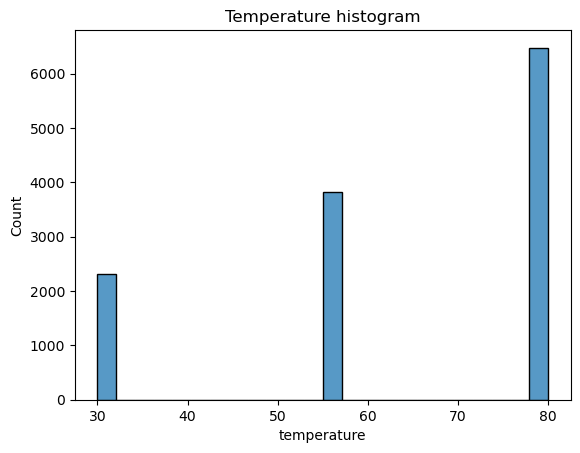

In [12]:
sns.histplot(data=data, x= 'temperature')
plt.title('Temperature histogram')
plt.savefig('images/temperature_histogram.jpg')
plt.show()

In [13]:
#Compute the pairwise correlation of columns in the dataset
data.corr()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
temperature,1.000000,-0.018599,NaN,-0.157089,-0.227165,0.097972,-0.097972,0.059393
has_children,-0.018599,1.000000,NaN,0.079434,-0.010773,-0.032353,0.032353,-0.045056
toCoupon_GEQ5min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toCoupon_GEQ15min,-0.157089,0.079434,NaN,1.000000,0.321260,-0.302066,0.302066,-0.082693
toCoupon_GEQ25min,-0.227165,-0.010773,NaN,0.321260,1.000000,-0.189900,0.189900,-0.108139
direction_same,0.097972,-0.032353,NaN,-0.302066,-0.189900,1.000000,-1.000000,0.014932
direction_opp,-0.097972,0.032353,NaN,0.302066,0.189900,-1.000000,1.000000,-0.014932
Y,0.059393,-0.045056,NaN,-0.082693,-0.108139,0.014932,-0.014932,1.000000


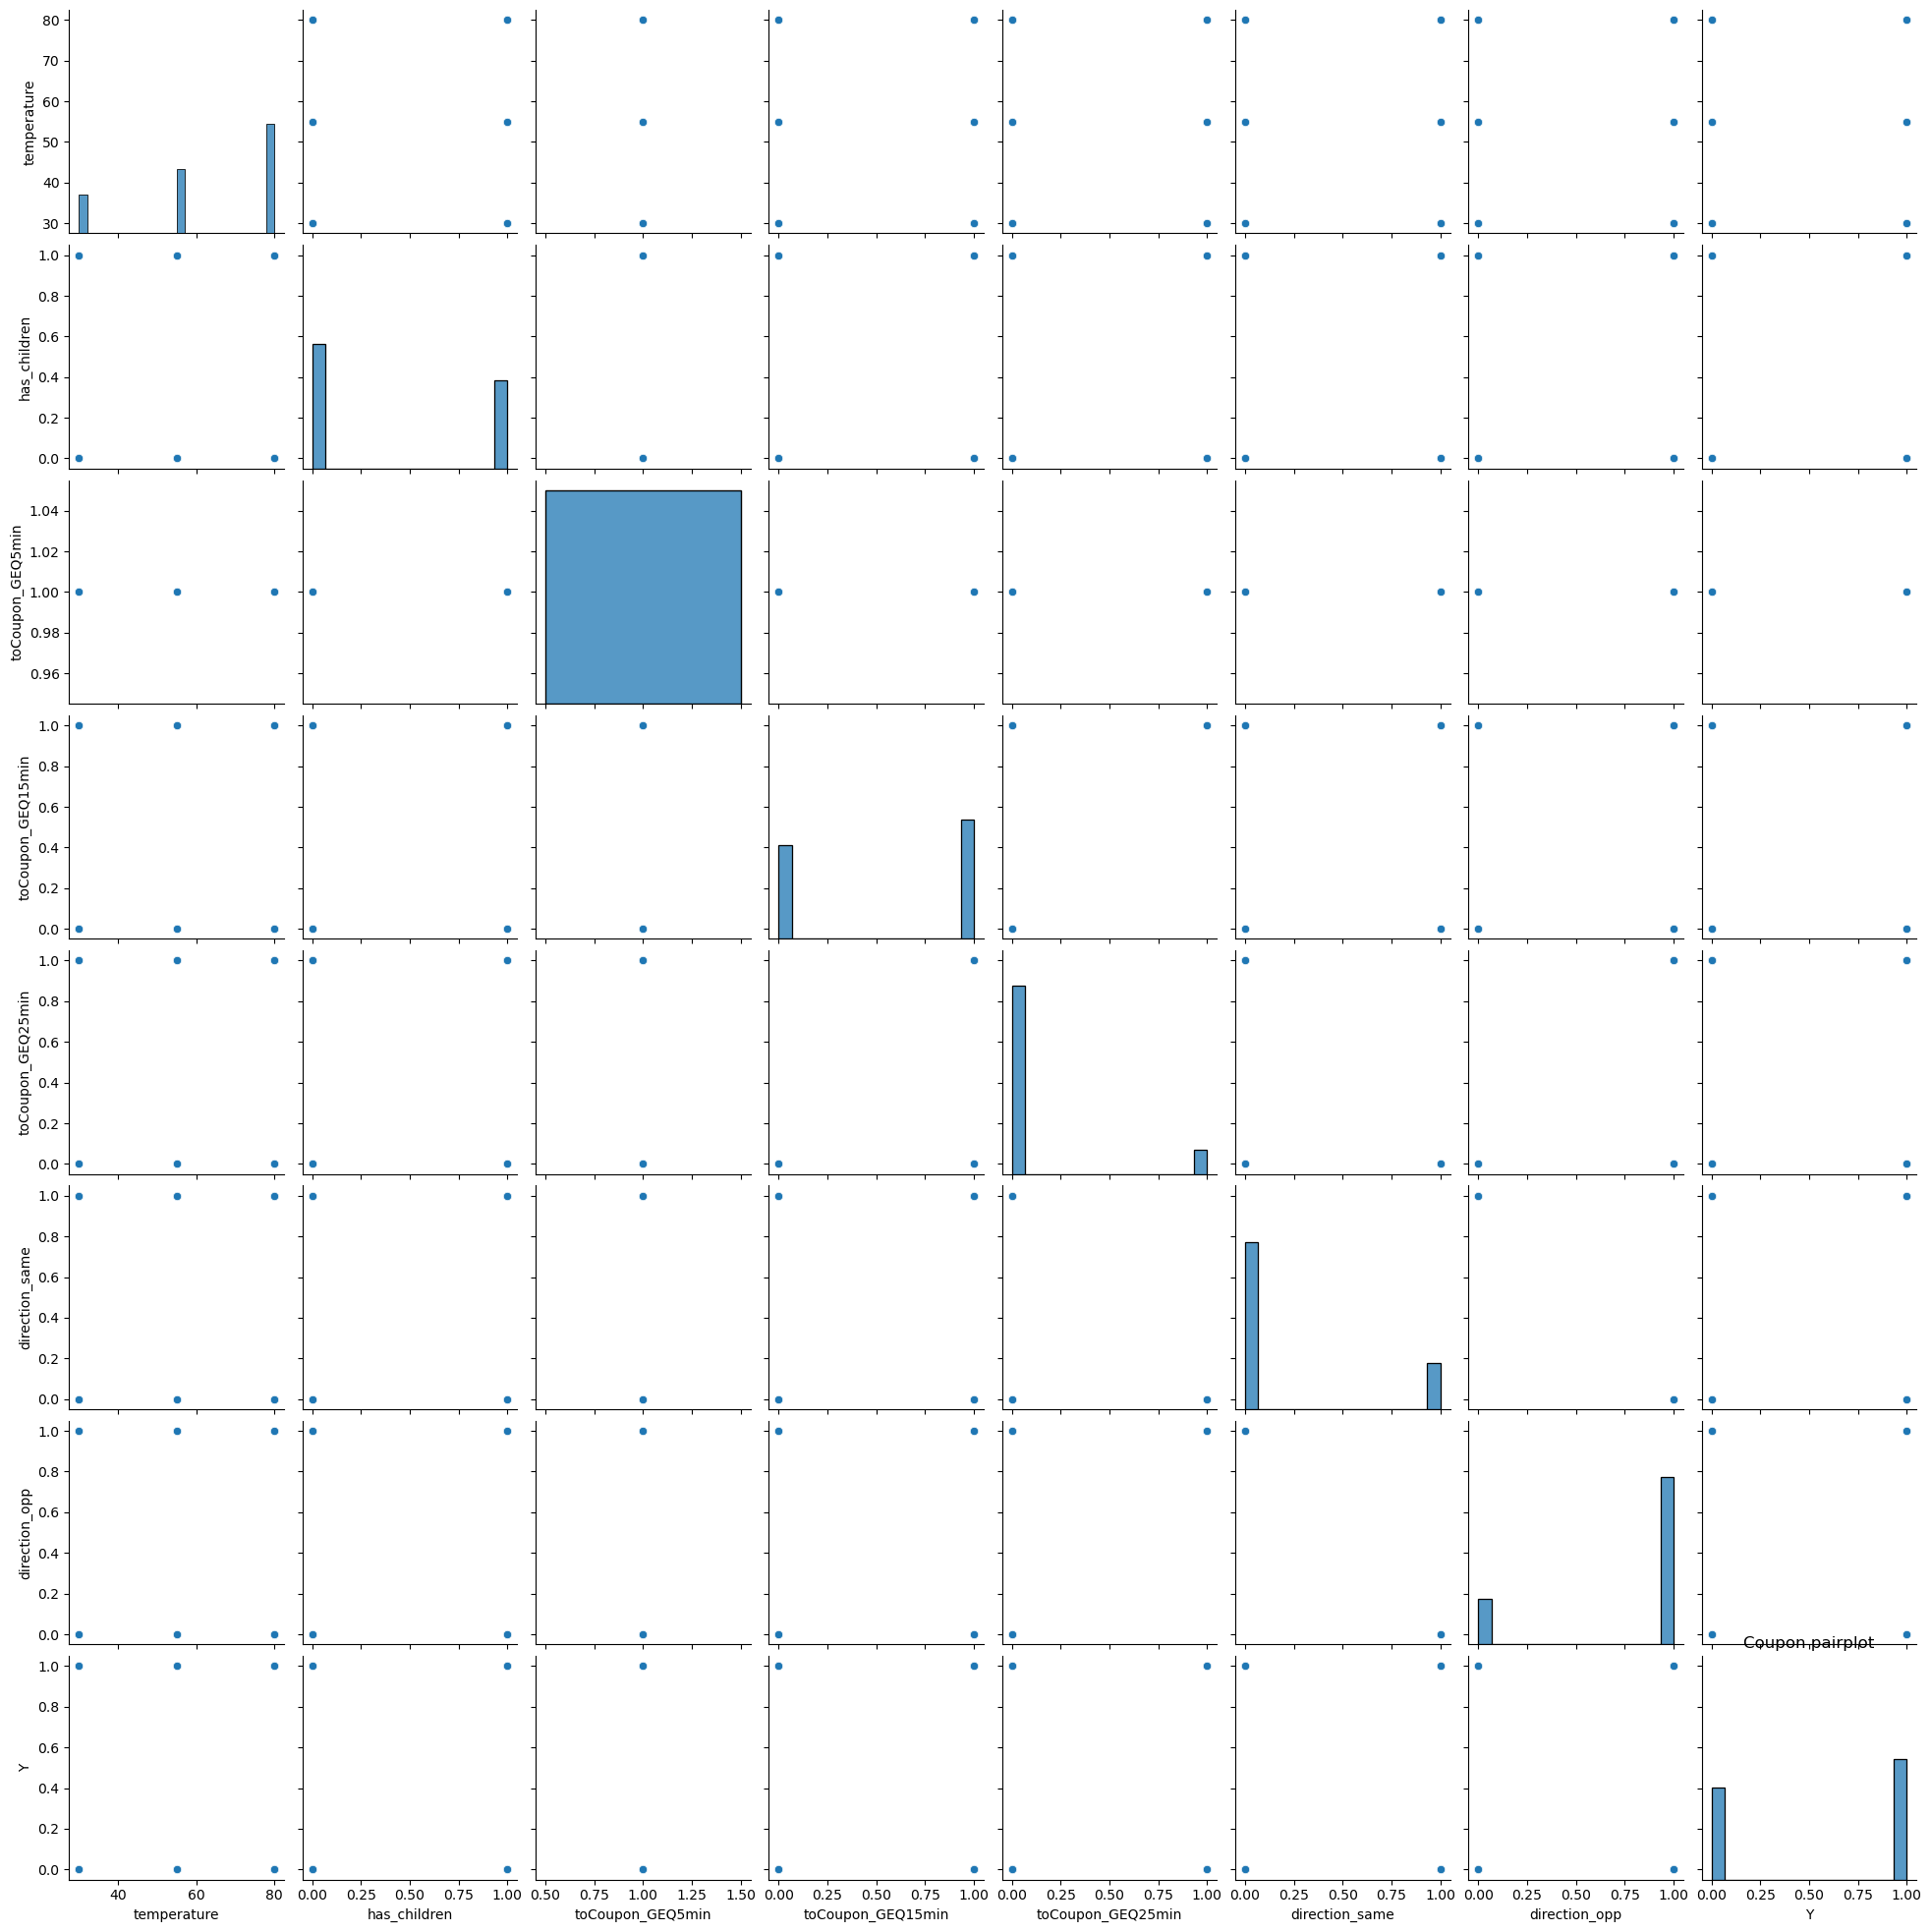

In [14]:
#Create a grid of plots that show pairwise relationships in the dataset
sns.pairplot(data)
plt.title('Coupon pairplot')
plt.savefig('images/coupon_pairplot.jpg')
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [15]:
bar_coupons = data[data['coupon']=='Bar'].copy()

2. What proportion of bar coupons were accepted?


In [16]:
ans2 = bar_coupons.query('Y == 1')[['Y']].count() / bar_coupons.shape[0]*100
print(ans2)


Y    40.995025
dtype: float64


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [17]:
#Count the frequency of unique values
bar_coupons['Bar'].value_counts()

never    830
less1    563
1~3      397
4~8      150
gt8       49
Name: Bar, dtype: int64

In [18]:
# Filter the data for those who went to a bar 3 or fewer times a month
driver_3_or_fewer_filter = bar_coupons.query("Bar in ['less1', '1~3']")

# Filter the data for those who went to a bar more than 3 times a month
driver_more_than_3_times_filter = bar_coupons.query("Bar in ['4~8', 'gt8']")

# Calculate the acceptance rate for both groups
acceptance_rate_driver_3_or_fewer_filter = driver_3_or_fewer_filter['Y'].mean()
acceptance_rate_driver_more_than_3_times_filter = driver_more_than_3_times_filter['Y'].mean()

print(f"Acceptance rate for those who go to a bar 3 or fewer times a month: {acceptance_rate_driver_3_or_fewer_filter: .3f}")
print(f"Acceptance rate for those who go to a bar more than 3 times a month: {acceptance_rate_driver_more_than_3_times_filter: .3f}")

Acceptance rate for those who go to a bar 3 or fewer times a month:  0.528
Acceptance rate for those who go to a bar more than 3 times a month:  0.769


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [19]:
#Count the frequency of unique values
bar_coupons['Bar'].value_counts()

never    830
less1    563
1~3      397
4~8      150
gt8       49
Name: Bar, dtype: int64

In [20]:
#Count the frequency of unique values
bar_coupons['age'].value_counts()

21         417
26         395
31         336
50plus     283
36         209
41         178
46         105
below21     87
Name: age, dtype: int64

In [21]:
# Filter the data for drivers who go to a bar more than once a month and are over the age of 25 
driver_filter = bar_coupons.query("Bar in ['1~3', '4~8', 'gt8'] & age in ['26', '31', '50plus', '36', '41', '46']")

# Filter the data to the all others.
all_others = bar_coupons.query("~(Bar in ['1~3', '4~8', 'gt8'] & age in ['26', '31', '50plus', '36', '41', '46'])")

# Calculate the acceptance rate for both groups
acceptance_rate_driver_filter = driver_filter['Y'].mean()
acceptance_rate_all_others = all_others['Y'].mean()

print(f"Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: {acceptance_rate_driver_filter: .3f}")
print(f"Acceptance rate for all_others: {acceptance_rate_all_others: .3f}")

Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25:  0.695
Acceptance rate for all_others:  0.335


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [22]:
#Count the frequency of unique values
data['passanger'].value_counts()

Alone        7248
Friend(s)    3292
Partner      1069
Kid(s)       1001
Name: passanger, dtype: int64

In [23]:
#Count the frequency of unique values
data['occupation'].value_counts()

Unemployed                                   1861
Student                                      1575
Computer & Mathematical                      1390
Sales & Related                              1088
Education&Training&Library                    939
Management                                    821
Office & Administrative Support               638
Arts Design Entertainment Sports & Media      627
Business & Financial                          543
Retired                                       493
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   239
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service                       175
Protective Service                            174
Life Physical Social Science                  169


In [24]:
# Filter the data for drivers who go to a bar more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

driver_filter = bar_coupons.query("Bar in ['1~3', '4~8', 'gt8'] & passanger != 'Kid(s)' & occupation != 'Farming Fishing & Forestry'")

# Filter the data to the all others.
all_others = bar_coupons.query("~(Bar in ['1~3', '4~8', 'gt8'] & passanger != 'Kid(s)' & occupation != 'Farming Fishing & Forestry')")

# Calculate the acceptance rate for both groups
acceptance_rate_driver_filter = driver_filter['Y'].mean()
acceptance_rate_all_others = all_others['Y'].mean()

print(f"Acceptance rate for drivers who go to a bar more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: {acceptance_rate_driver_filter: .3f}")
print(f"Acceptance rate for all_others: {acceptance_rate_all_others: .3f}")

Acceptance rate for drivers who go to a bar more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry:  0.713
Acceptance rate for all_others:  0.295


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [25]:
#Count the frequency of unique values
bar_coupons['maritalStatus'].value_counts()

Married partner      875
Single               661
Unmarried partner    378
Divorced              75
Widowed               21
Name: maritalStatus, dtype: int64

In [26]:
#Count the frequency of unique values
bar_coupons['age'].value_counts()

21         417
26         395
31         336
50plus     283
36         209
41         178
46         105
below21     87
Name: age, dtype: int64

In [27]:
#Count the frequency of unique values
bar_coupons['RestaurantLessThan20'].value_counts()

1~3      878
4~8      565
less1    321
gt8      186
never     37
Name: RestaurantLessThan20, dtype: int64

In [28]:
#Count the frequency of unique values
bar_coupons['income'].value_counts()

$25000 - $37499     318
$12500 - $24999     288
$100000 or More     288
$37500 - $49999     267
$50000 - $62499     262
Less than $12500    165
$75000 - $87499     151
$87500 - $99999     141
$62500 - $74999     130
Name: income, dtype: int64

In [29]:
# Filter the data based on the specified condition
filtered_data = bar_coupons.query(
    "(Bar in ['1~3', '4~8', 'gt8'] & passanger != 'Kid(s)' & maritalStatus != 'Widowed') | "
    "(Bar in ['1~3', '4~8', 'gt8'] & age in ['below21', '21', '26']) | "
    "(RestaurantLessThan20 in ['4~8', 'gt8'] & income in ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])"
)
# Calculate the acceptance rate for the filtered data
acceptance_rate_filtered = filtered_data['Y'].mean()

print(f"Acceptance rate for the specified conditions: {acceptance_rate_filtered: .3f}")

Acceptance rate for the specified conditions:  0.589


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

**Findings** 

I infer the following that influence drivers to accept bar coupons:

1. **Frequency of Bar Visits**: Drivers who go to a bar more than 3 times a month have a higher acceptance rate (0.769) compared to those who go 3 or fewer times a month (0.528). 

2. **Age and Frequency**: Drivers who go to a bar more than once a month and are over the age of 25 have a higher acceptance rate (0.695) compared to all others (0.335). 

3. **Passenger and Occupation**: Drivers who go to a bar more than once a month, had passengers that were not a kid, and had occupations other than farming, fishing, or forestry have a high acceptance rate (0.713) compared to all others (0.295). This suggests that certain occupations may influence the likelihood of accepting bar coupons.

4. **Combined Factors**: Drivers who meet any of the following conditions have an acceptance rate of 0.589:
   - Go to bars more than once a month, had passengers that were not a kid, and were not widowed
   - Go to bars more than once a month and are under the age of 30
   - Go to cheap restaurants more than 4 times a month and have an income of less than $50,000

   This combined acceptance rate indicates that a mix of social habits, age, and economic factors contribute to the likelihood of accepting bar coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

**Investigating the Coffee Coupons**

Now, I'll go through an exploration of just the coffee related coupons.  

1. Create a new `DataFrame` that contains just the coffee coupons.


In [30]:
# Filter the data for coffee coupons
coffee_coupons = data[data['coupon'] == 'Coffee House']

# Calculate the acceptance rate for coffee coupons
acceptance_rate_coffee = coffee_coupons['Y'].mean()

# Explore characteristics of passengers who accept coffee coupons
accepted_coffee_coupons = coffee_coupons[coffee_coupons['Y'] == 1]

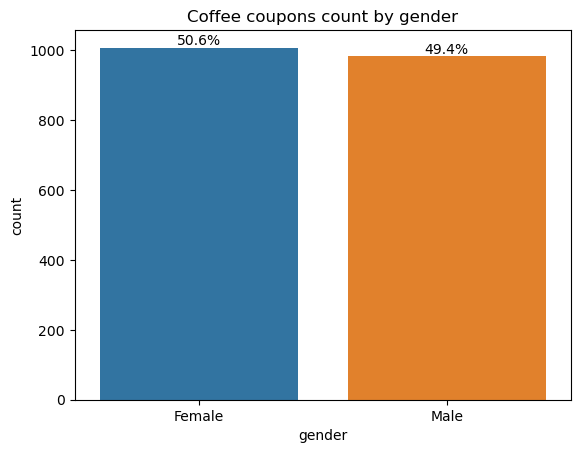

In [31]:
# Analyze characteristics gender distribution 
plot = sns.countplot(data=accepted_coffee_coupons, x='gender')

# get the total count of the type column
total = accepted_coffee_coupons['gender'].count()

# annotate the bars
for c in plot.containers:
    plot.bar_label(c, fmt=lambda x: f'{(x/total)*100:0.1f}%')
plt.title('Coffee coupons count by gender')
plt.savefig('images/coffee_count_by_gender.jpg')
plt.show()

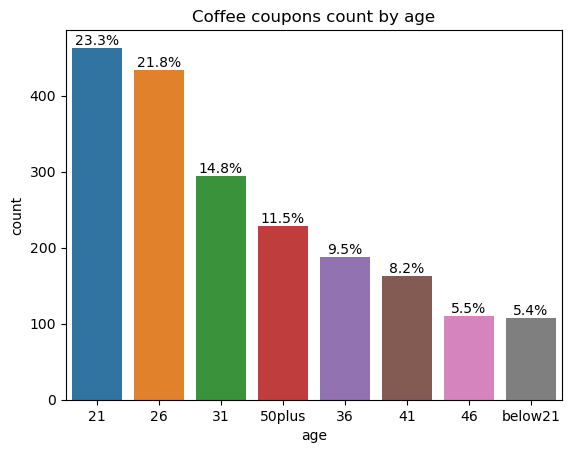

In [32]:
# Analyze characteristics age distribution 
plot = sns.countplot(data=accepted_coffee_coupons, x='age', order = accepted_coffee_coupons['age'].value_counts().index)

# get the total count of the type column
total = accepted_coffee_coupons['age'].count()

# annotate the bars
for c in plot.containers:
    plot.bar_label(c, fmt=lambda x: f'{(x/total)*100:0.1f}%')
plt.title('Coffee coupons count by age')
plt.savefig('images/coffee_count_by_age.jpg')

plt.show()

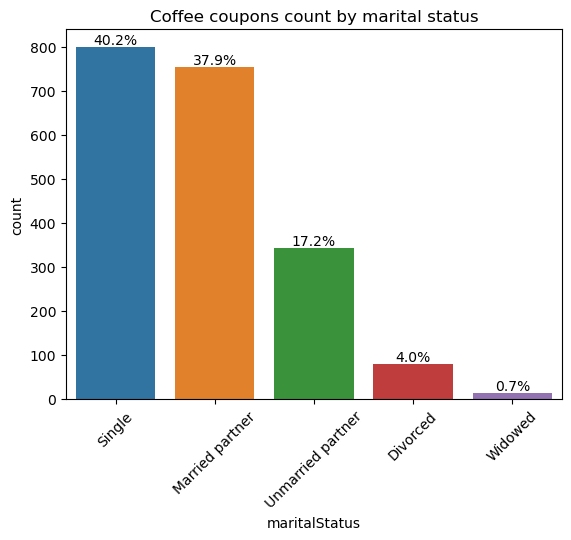

In [33]:
# Analyze characteristics maritalStatus distribution 
plot = sns.countplot(data=accepted_coffee_coupons, x='maritalStatus', order = accepted_coffee_coupons['maritalStatus'].value_counts().index)

# get the total count of the type column
total = accepted_coffee_coupons['maritalStatus'].count()

# annotate the bars
for c in plot.containers:
    plot.bar_label(c, fmt=lambda x: f'{(x/total)*100:0.1f}%')

plt.xticks(rotation=45)
plt.title('Coffee coupons count by marital status')
plt.savefig('images/coffee_count_by_marital_status.jpg')

plt.show()

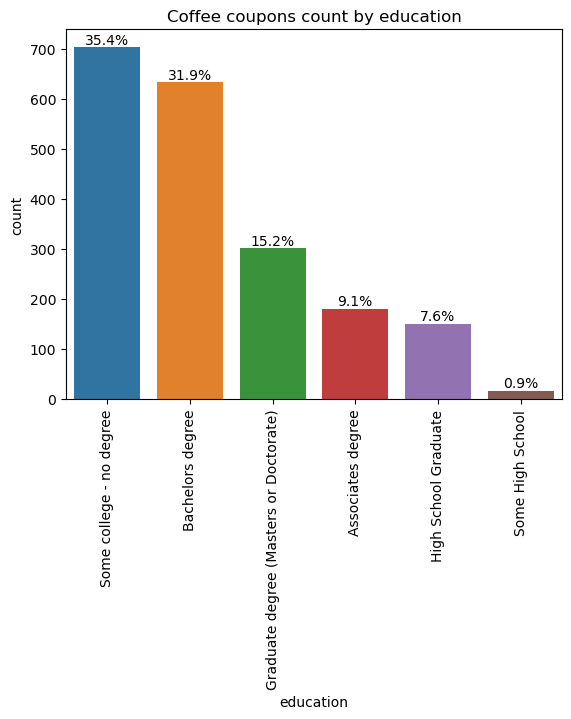

In [34]:
# Analyze characteristics education distribution 
plot = sns.countplot(data=accepted_coffee_coupons, x='education', order = accepted_coffee_coupons['education'].value_counts().index)

# get the total count of the type column
total = accepted_coffee_coupons['education'].count()

# annotate the bars
for c in plot.containers:
    plot.bar_label(c, fmt=lambda x: f'{(x/total)*100:0.1f}%')

plt.xticks(rotation=90)
plt.title('Coffee coupons count by education')
plt.savefig('images/coffee_count_by_education.jpg')

plt.show()

**Findings** 
Based on the above, I can assume several characteristics about passengers who accept coffee coupons:

1. **Gender**: The acceptance rate is almost evenly split between females (50.63%) and males (49.37%). 

2. **Age**: The majority of passengers who accept coffee coupons are in the younger age groups:
   - 21 years old (23.28%)
   - 26 years old (21.82%)
   - 31 years old (14.78%)

3. **Marital Status**: 
   - Single individuals (40.22%) and those with a married partner (37.91%) are the most likely to accept coffee coupons.
   - Unmarried partners also have a notable acceptance rate (17.24%).

4. **Education**: 
   - Those with some college education but no degree (35.39%) and those with a bachelor's degree (31.88%) are the most likely to accept coffee coupons.
   - Graduate degree holders (15.18%) also show a significant acceptance rate.

   This indicates that individuals with higher education levels are more inclined to accept coffee coupons.

Overall, younger individuals, particularly those who are single, students, and those with higher education levels, are more likely to accept coffee coupons.